In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [47]:
d_fGS = [17, 18, 19, 20, 21, 22]

data_path = []
data_path.append('data\\17.txt')
data_path.append('data\\18.txt')
data_path.append('data\\19.txt')
data_path.append('data\\20.txt')
data_path.append('data\\21.txt')
data_path.append('data\\22.txt')

numberPlots = 6

# data_label = []
# for i in range(numberPlots):
#     data_label.append('$FF_{{final}}$ = {}'.format(finalFF[i]))

In [48]:
data = []
T_tick_positions = []
T_tick_labels = []
for i in range(numberPlots):
    data_current = pd.read_csv(data_path[i], sep=" ", header=None, skiprows= 29)
    print(data_current.iloc[:, 1:].shape)
    data.append(-1* data_current.iloc[:, 1:].T)
    all_values = []
    print
    for j in range(11):
        all_values.extend(data[i][j].to_numpy())
    Tmin = min(all_values)
    Tmax = max(all_values)
    pos = np.linspace(Tmin, Tmax, 3)
    T_tick_positions.append(pos)
    T_tick_labels.append(np.round(pos, 3))

x_ticks = pd.read_csv(data_path[0], sep=" ", header=None, skiprows= 3, nrows= 11)
x_ticks = x_ticks.iloc[:, 1:]
x_ticks = x_ticks.to_numpy()[:,0]*1000000
x_ticks = [int(x) for x in x_ticks]
# minor_x_ticks= x_ticks
x_ticks = x_ticks[::2]

y_ticks = pd.read_csv(data_path[0], sep=" ", header=None, skiprows= 16, nrows= 11)
y_ticks = y_ticks.iloc[:, 1:]
y_ticks = y_ticks.to_numpy()[:,0]
# minor_y_ticks = y_ticks
y_ticks = y_ticks[::2]
print(y_ticks)
y_ticks_period = [900, 896, 892, 888, 884, 880]
print(y_ticks_period)

ymax = max(y_ticks)
ymin = min(y_ticks)
c = (ymax - ymin)/22
y_tick_positions_minor = np.linspace(ymin + c, ymax -c, 11)[1::2]
y_tick_positions_major = np.linspace(ymin + c, ymax -c, 11)[::2]
xmax = max(x_ticks)
xmin = min(x_ticks)
cx = (xmax - xmin)/22
x_tick_positions_minor = np.linspace(xmin + cx, xmax -cx, 11)[1::2]
x_tick_positions_major = np.linspace(xmin + cx, xmax -cx, 11)[::2]

print(x_ticks)

(11, 11)
(11, 11)
(11, 11)
(11, 11)
(11, 11)
(11, 11)
[0.22  0.285 0.349 0.414 0.48  0.547]
[900, 896, 892, 888, 884, 880]
[90, 130, 170, 210, 250, 290]


In [49]:
# POSSIBLE FUTURE IMPROVEMENT
import matplotlib.ticker as ticker

# ax.xaxis.set_major_locator(ticker.MultipleLocator(2))  # Set major ticks to be at every 2
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))  # Set minor ticks to be at every 1


[0.17267736 0.27764328 0.3826092 ]
[0.19155065 0.30650378 0.42145691]
[0.20868431 0.32334691 0.43800951]
[0.22347679 0.32836046 0.43324414]
[0.22525431 0.32031014 0.41536597]
[0.20015691 0.29652546 0.39289402]


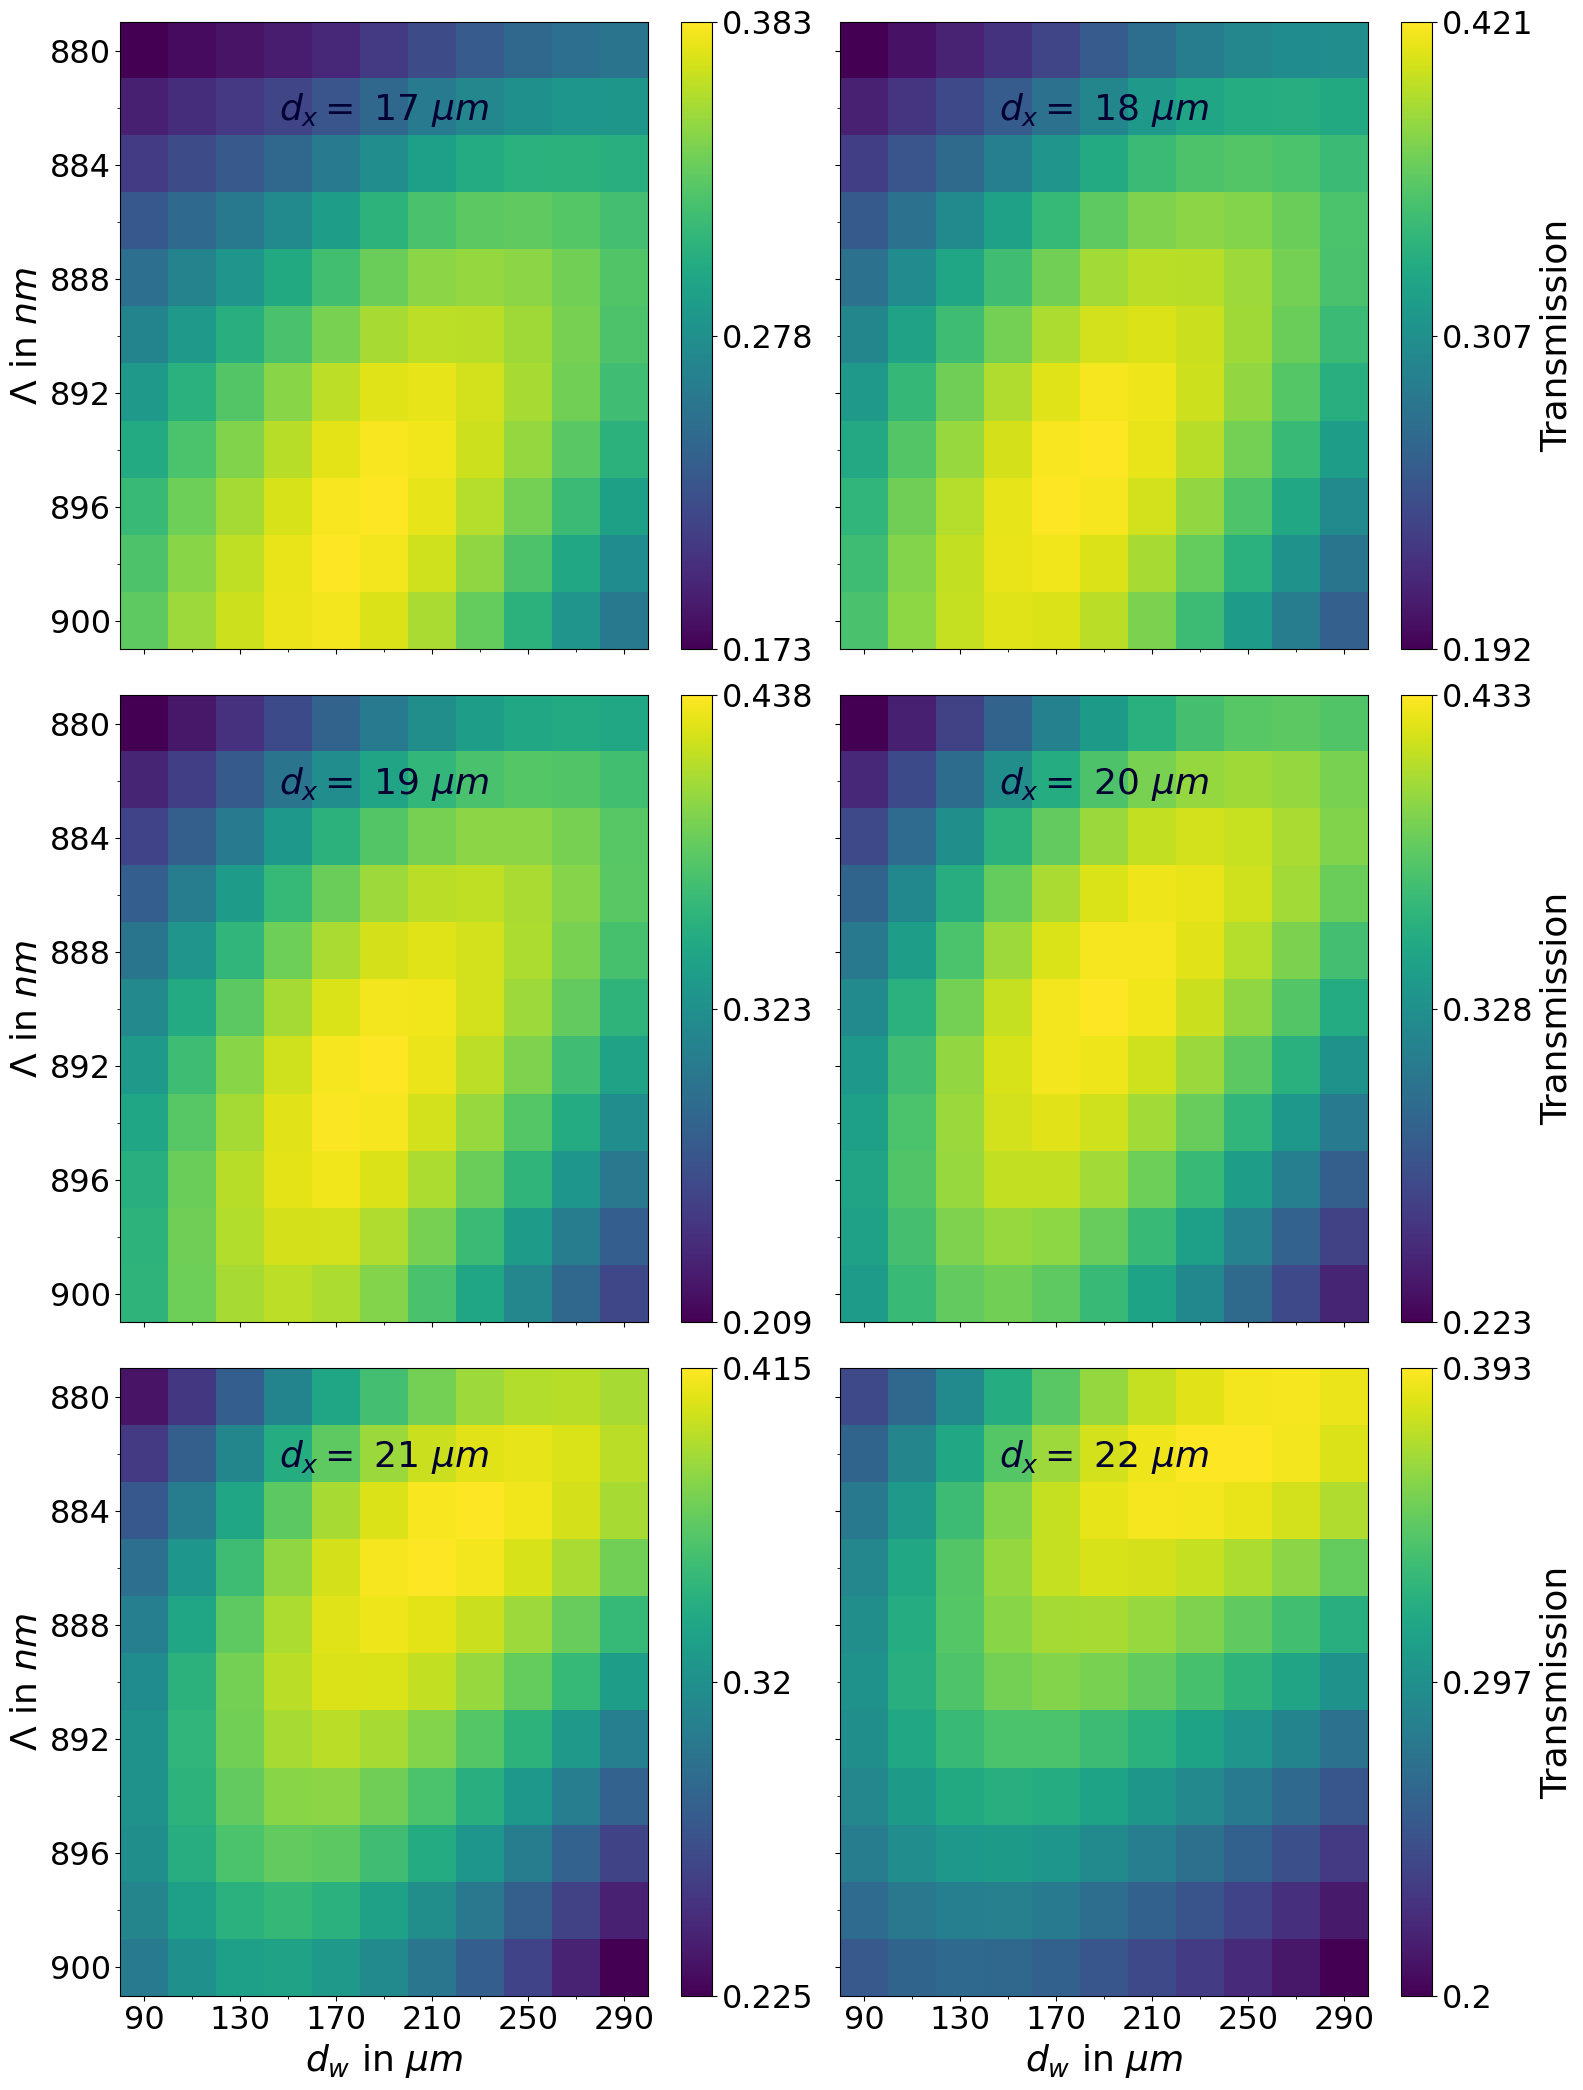

In [64]:
# 3 times 2 

# Assuming 'data' is a list of 2D arrays, 'x_ticks', 'y_ticks', 'x_tick_positions', 'y_tick_positions', 'd_fGS', and 'T_tick_positions' are defined
numberPlots = 6  # or the length of your 'data' list if it's not 6
labelsize = 23
labelsize_name = 26
fontsize = 26

y_labels = [True, False, True, False, True, False]
x_labels = [False, False, False, False, True, True]

# Define the extent outside the loop
extent = [min(x_ticks), max(x_ticks), min(y_ticks), max(y_ticks)]

# Create a figure with a 3x2 grid of axes
fig, axs = plt.subplots(3, 2, figsize=(16, 21))  # Adjust the figsize to fit your needs

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop through your data and plot each dataset on one of the subplots
for i in range(numberPlots):
    # Select the current axis
    ax = axs[i]
    
    # Create the imshow plot for the current dataset
    im = ax.imshow(data[i], extent=extent, aspect='auto')
    
    # Set the ticks and labels
    ax.set_xticks(x_tick_positions_major)
    ax.set_xticks(x_tick_positions_minor, minor = True)
    ax.set_yticks(y_tick_positions_major)
    ax.set_yticks(y_tick_positions_minor, minor = True)

    if (x_labels[i]):
        ax.set_xticklabels(x_ticks)
        ax.set_xlabel('$d_w$ in $\\mu m$', fontsize = labelsize_name)
    else:
        ax.set_xticklabels([])
    if (y_labels[i]):
        ax.set_ylabel('$\\Lambda$ in $nm$', fontsize = labelsize_name)
        ax.set_yticklabels(y_ticks_period)
    else:
        ax.set_yticklabels([])

    ax.tick_params(axis = 'both', labelsize = labelsize)

    # Optionally set labels and title
    # ax.set_ylabel('$FF_{{final}}$')
    # ax.set_xlabel('distance from waist')
    ax.set_title('$d_x=$ {} $\\mu m$'.format(d_fGS[i]), fontsize = fontsize, y = 0.83, color = '#000033')
    # x = 0.5
    # y = 0.85
    # ax.text(x, y, '$d_x=$ {} $\mu m$'.format(d_fGS[i]), fontsize=fontsize, ha='center')

    # Add a colorbar to each subplot
    print(T_tick_positions[i])
    heatmap = fig.colorbar(im, ax=ax, ticks=T_tick_positions[i])
    if (not y_labels[i]):
        heatmap.set_label('Transmission', fontsize=labelsize_name)        
    
    heatmap.set_ticklabels(T_tick_labels[i])
    heatmap.ax.tick_params(labelsize=labelsize)
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()
fig.savefig('heatmap_6plots.png', dpi=300)

NameError: name 'x_tick_positions' is not defined

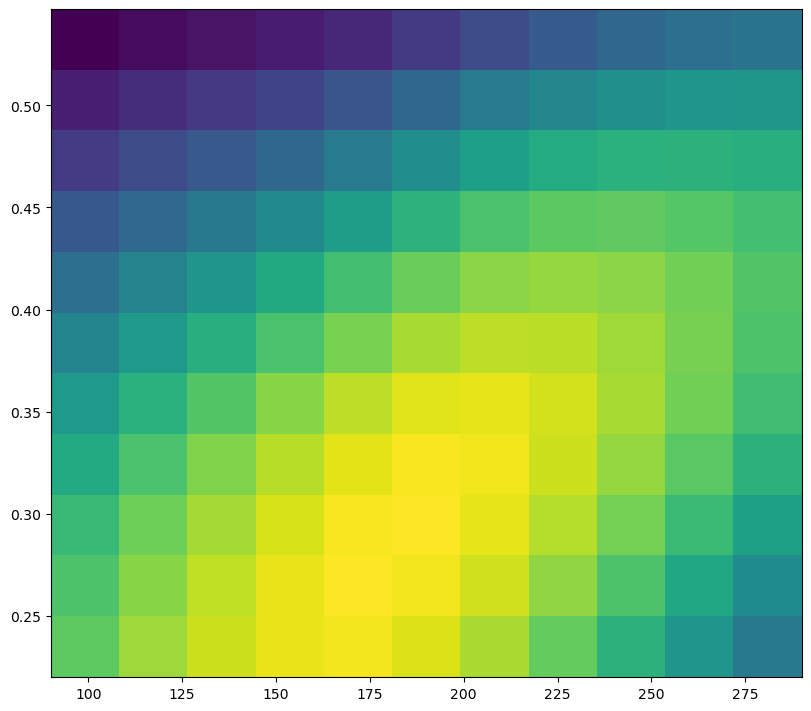

In [51]:
extent = [min(x_ticks), max(x_ticks), min(y_ticks), max(y_ticks)]

for i in range(numberPlots):
    fig, ax = plt.subplots(figsize=(8, 7), layout='constrained')
    im = ax.imshow(data[i], extent=extent, aspect='auto') 

    ax.set_xticks(x_tick_positions)
    ax.set_yticks(y_tick_positions)
    # ax.set_ylabel('$FF_{{final}}$')
    # ax.set_xlabel('distance from waist')
    ax.set_title('$d_{{fGS}}=$ {} $\\mu m$'.format(d_fGS[i]))

    ax.set_xticklabels(x_ticks)
    ax.set_yticklabels(y_ticks)

    fig.colorbar(im, ax=ax, ticks = T_tick_positions[i])
    plt.show()